## Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score

## Loading and Exploring the Dataset

In [27]:
# Define the path
data_path = r'C:\Users\PC\OneDrive\Documents\Internship\Grouping (PI)\Mall_Customers.csv'

# Load the dataset
data = pd.read_csv(data_path)

# Display the first few rows and data types
print(data.head())
print(data.dtypes)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


## Data Preprocessing

In [28]:
# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

## Elbow Method for Optimal Clusters

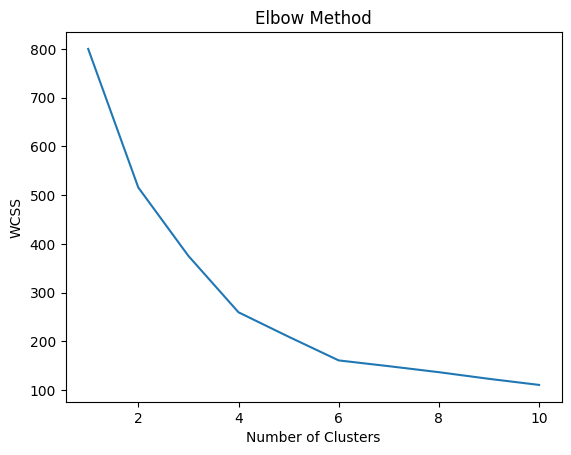

In [29]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## KMeans Clustering

In [30]:
# Applying KMeans with 3 clusters (as selected from the Elbow Method)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Adding the cluster labels to the original data
data['Cluster'] = clusters
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


## Visualizing Customer Segments

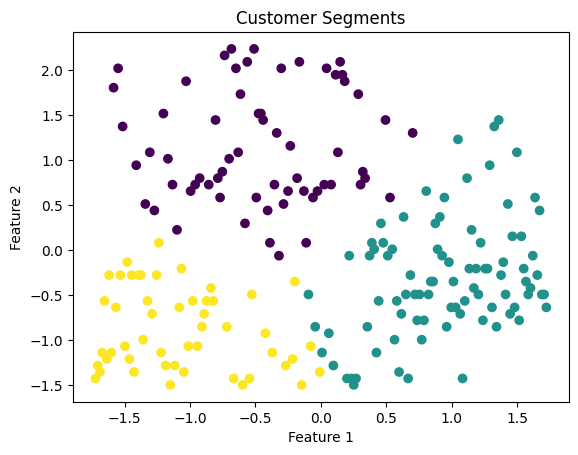

In [31]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [32]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')


## Cluster Analysis

In [33]:
# Grouping by clusters and calculating mean values
numeric_data_with_clusters = data.select_dtypes(include=[np.number])
cluster_analysis = numeric_data_with_clusters.groupby('Cluster').mean()
print(cluster_analysis)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         73.253968  54.714286           49.492063               40.571429
1        155.321839  34.413793           83.839080               51.839080
2         39.440000  26.580000           34.000000               59.480000


## Silhouette Score for Cluster Evaluation

In [34]:
# Calculating silhouette score to evaluate the quality of clusters
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3371428082096961


## Pairplot Visualization of Clusters

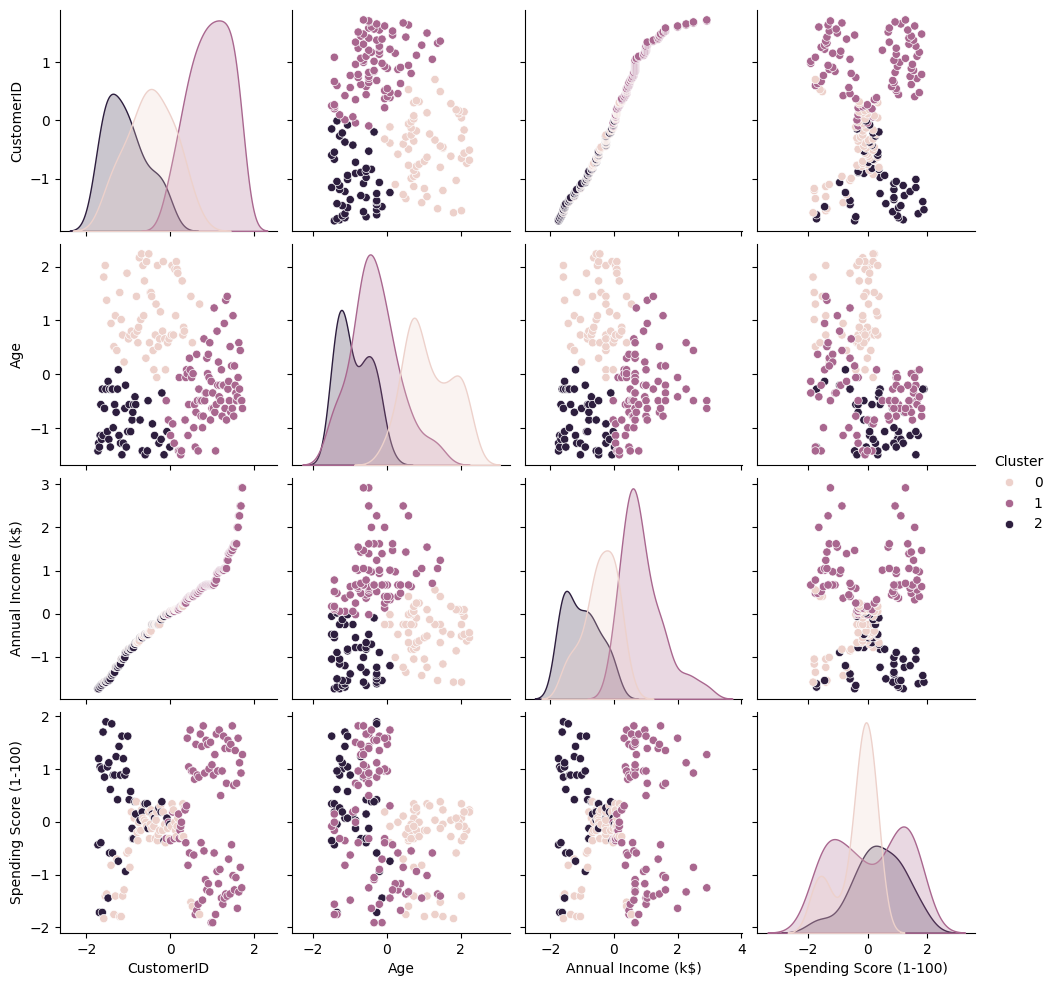

In [35]:
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)
scaled_df['Cluster'] = clusters

sns.pairplot(scaled_df, hue='Cluster')
plt.show()

## Additional Visualisations

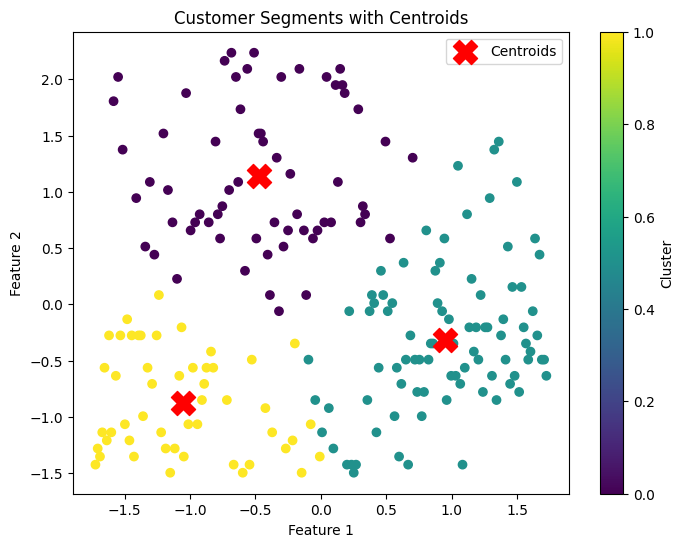

In [36]:
# Visualizing the cluster centers
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

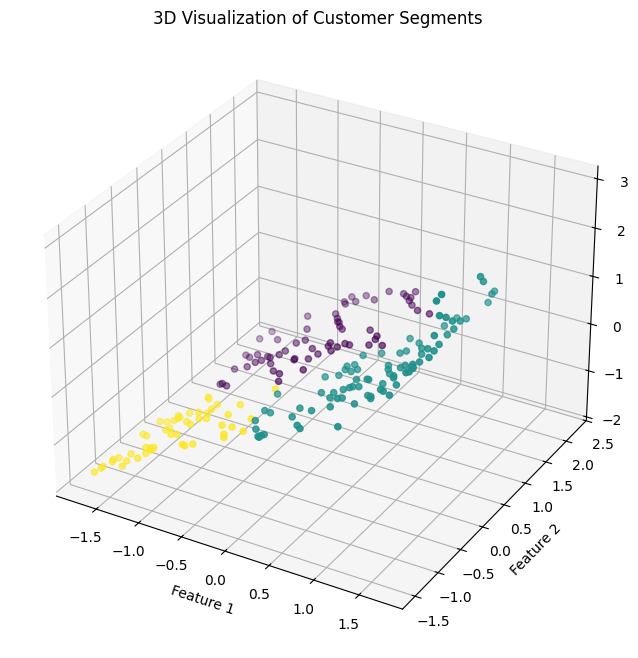

In [37]:
# Visualizing the clusters in 3D (if there are at least 3 features)
if numeric_data.shape[1] >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2], c=clusters, cmap='viridis')
    ax.set_title('3D Visualization of Customer Segments')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_12384\4133404455.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')


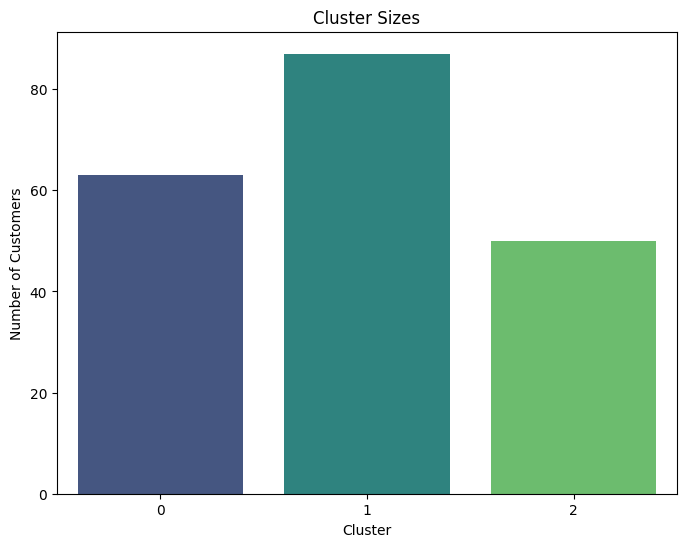

In [38]:
# Visualizing the size of each cluster
cluster_sizes = data['Cluster'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

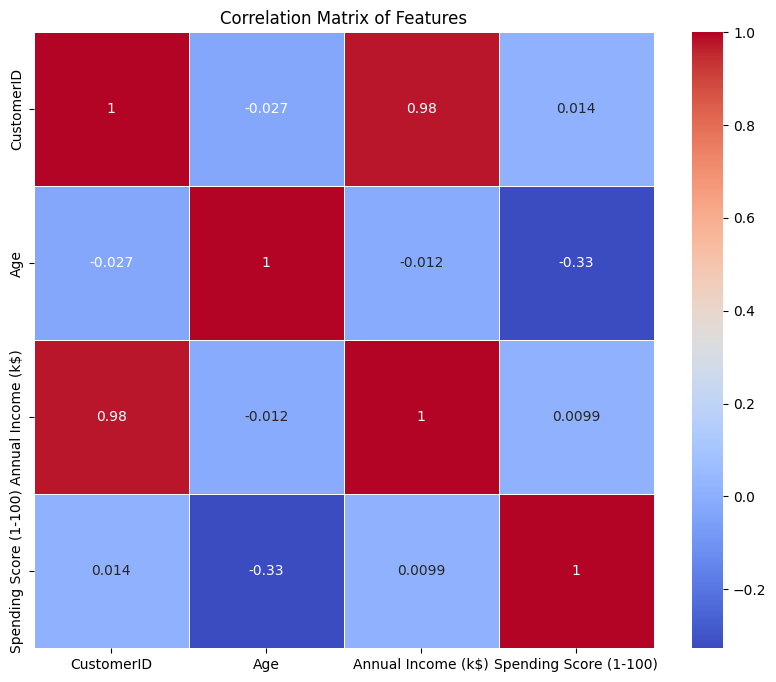

In [39]:
# Visualizing the correlation matrix of numeric features
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

### **Summary**

In this project, I applied KMeans clustering to segment mall customers based on numerical features. Key steps included:

1. **Data Preparation**: Loaded and scaled the dataset for clustering.
2. **Optimal Clusters**: Used the Elbow Method to select 3 clusters.
3. **Cluster Analysis**: Visualized customer segments and analyzed cluster characteristics.
4. **Cluster Evaluation**: Calculated the silhouette score to assess cluster quality.

---

### **Conclusion**

The clustering segmented customers into 3 groups, but the silhouette score suggests the clusters are not well-separated. This could be due to:
- **Irrelevant features** or missing data that affect cluster cohesion.
- **KMeans limitations** in handling complex data distributions.

To improve, exploring additional features or trying different clustering algorithms might enhance the results.